___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# K Means Clustering with Python

This notebook is just a code reference for the video lecture and reading.

## Method Used

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

## Import Libraries

In [1]:
from platform import python_version
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

%matplotlib inline

In [2]:
print("version:")
print("python: ", python_version())
print("numpy: ", np.__version__)
print("seaborn: ", sns.__version__)
print("matplotlib: ", sns.__version__)
print("sklearn: ", sklearn.__version__)

version:
python:  3.7.1
numpy:  1.15.4
seaborn:  0.9.0
matplotlib:  0.9.0
sklearn:  0.20.2


## Create some Data

In [3]:
#from sklearn.datasets import make_blobs

In [4]:
# Create Data
# make_blobs:
# Generate isotropic Gaussian blobs for clustering.
#
data = make_blobs(n_samples=200, n_features=2, 
                           centers=4, cluster_std=1.8,random_state=101)


In [5]:
# data is a tuple, np array in it
print(data[0].shape)
print(data[1].shape)

print(data[0]) # (200,2) : 200 samples and 2 features
print(data[1]) # (200,) : 200 samples and its blobs (0-3)

(200, 2)
(200,)
[[-6.42884095e+00  1.01411174e+01]
 [ 5.86867888e+00  5.20110356e+00]
 [-3.76109375e-01  3.26427943e+00]
 [ 2.16679181e+00  9.56300522e+00]
 [ 5.09508570e+00  7.20752718e+00]
 [-1.08788882e+01 -6.11318040e+00]
 [ 2.03405554e+00  9.76664755e+00]
 [-1.71798771e+00  1.41401140e+00]
 [ 1.16911341e+00  8.24556988e+00]
 [-1.35185444e+00  3.13245345e+00]
 [-6.18548214e+00  9.67406555e+00]
 [-1.19856602e+00  2.50408937e+00]
 [ 2.90296863e+00  7.91251003e+00]
 [ 2.39250023e+00  5.38173971e+00]
 [-5.27545147e+00  9.63836659e+00]
 [-5.66814687e-01  5.60262755e-02]
 [ 5.97336628e+00  5.87172022e+00]
 [-2.31355268e+00  5.23980092e-01]
 [-1.01344756e+01 -3.43130837e+00]
 [-4.54082629e+00  1.13920174e+01]
 [-1.04155833e+01 -5.67545836e+00]
 [ 6.64796693e-01  9.42304718e-02]
 [ 2.11460477e+00  3.55938488e+00]
 [-1.11790221e+01 -9.30976605e+00]
 [-6.63698251e+00  6.39426436e+00]
 [-7.67422005e+00 -7.26839654e+00]
 [-7.98668260e+00 -9.57113308e+00]
 [ 1.27983684e+00  3.53150777e-01]
 [ 3

In [6]:
# or use x and y
x, y = make_blobs(n_samples=200, n_features=2, 
                           centers=4, cluster_std=1.8,random_state=101)
print(x.shape)
print(y.shape)


(200, 2)
(200,)


## Visualize Data

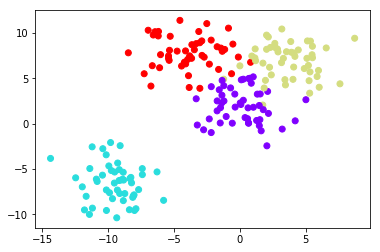

In [7]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

# or
#plt.scatter(x[:,0],x[:,1],c=y,cmap='rainbow')

## Creating the Clusters

In [8]:
#from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(n_clusters=4)

In [10]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
kmeans.cluster_centers_

array([[-4.13591321,  7.95389851],
       [-0.0123077 ,  2.13407664],
       [-9.46941837, -6.56081545],
       [ 3.71749226,  7.01388735]])

In [12]:
kmeans.labels_

array([0, 3, 1, 3, 3, 2, 3, 1, 3, 1, 0, 1, 3, 3, 0, 1, 3, 1, 2, 0, 2, 1,
       1, 2, 0, 2, 2, 1, 3, 3, 0, 2, 3, 1, 1, 0, 2, 2, 2, 1, 2, 0, 0, 0,
       1, 3, 0, 1, 2, 1, 1, 0, 3, 1, 2, 0, 1, 1, 0, 3, 2, 3, 2, 0, 3, 1,
       2, 3, 3, 2, 3, 1, 2, 1, 2, 3, 3, 1, 0, 1, 1, 2, 3, 2, 1, 1, 1, 0,
       1, 2, 2, 2, 2, 1, 1, 2, 3, 0, 2, 3, 1, 2, 1, 1, 3, 1, 2, 3, 2, 2,
       3, 0, 0, 3, 2, 3, 0, 0, 3, 0, 1, 0, 1, 0, 1, 3, 0, 1, 2, 0, 0, 0,
       1, 2, 2, 0, 3, 0, 3, 1, 2, 3, 2, 0, 0, 3, 1, 2, 0, 0, 0, 0, 1, 3,
       1, 0, 3, 3, 3, 1, 3, 1, 1, 0, 2, 0, 1, 3, 0, 1, 3, 1, 0, 3, 1, 0,
       3, 3, 2, 3, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 3, 3, 0, 2, 1, 3, 3,
       2, 1], dtype=int32)

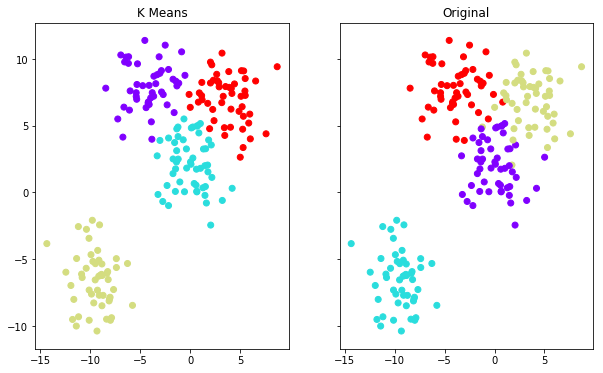

In [13]:
# because we know the correct label, we can compare.
# in reality you dont know the correct label
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

You should note, the colors are meaningless in reference between the two plots.

# Great Job!

Text(0.5, 1.0, 'error vs iteration')

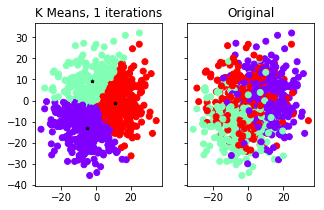

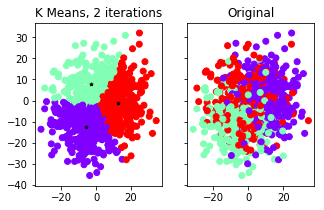

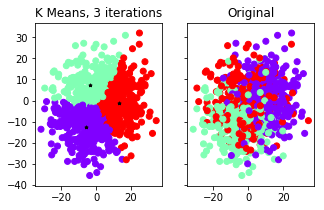

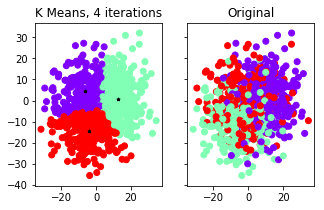

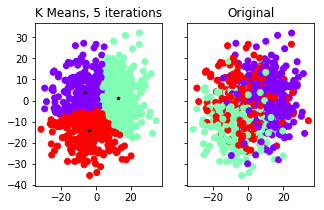

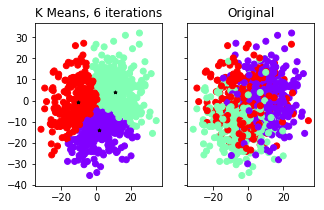

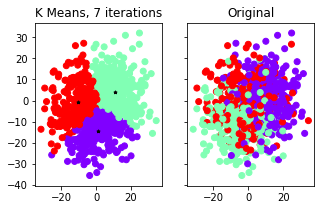

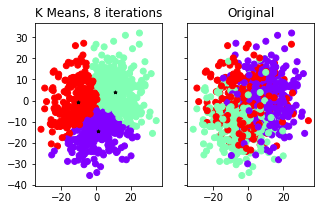

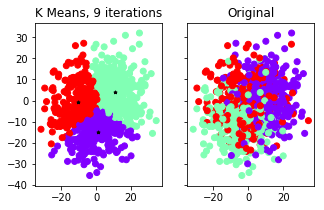

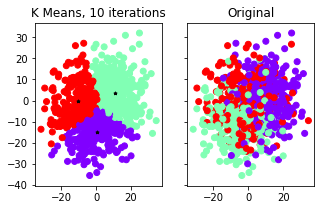

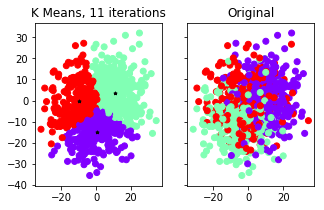

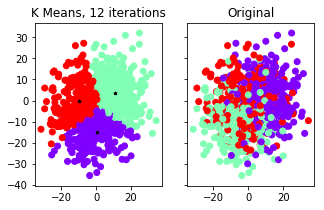

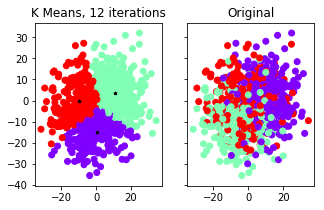

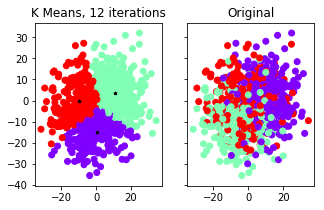

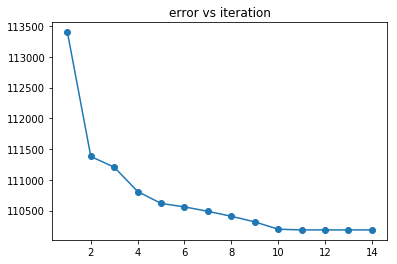

In [14]:
# error vs iterations 
cluster = 3
data = make_blobs(n_samples=1000, n_features=2, 
                           centers=cluster, cluster_std=10,random_state=45)
sse=[]
for i in np.arange(1,15):
    #print(i)
    #kmeans.
    kmeans = KMeans(n_clusters=cluster,max_iter=i,random_state=101)
    kmeans.fit(data[0])
    C = kmeans.cluster_centers_
    sse.append(kmeans.inertia_)
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(5,3))
    ax1.set_title('K Means, %i iterations' %kmeans.n_iter_)
    ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
    ax1.scatter(C[:, 0], C[:, 1], marker='*', c='#050505', s=10)
    ax2.set_title("Original")
    ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

plt.figure()
plt.plot(np.arange(1,15),sse,'o-')
plt.title('error vs iteration')
#
# https://mubaris.com/posts/kmeans-clustering/
# https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion
# 
# Why don't we rescale the data for K-Means like we did on K-Nearest-Neighbours?
# => you want to do that ...
# https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/learn/v4/questions/3494058
#
# How to know if the data is clusterable or not?
# https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/learn/v4/questions/4905580
#

Text(0.5, 1.0, 'silhouette_score vs k')

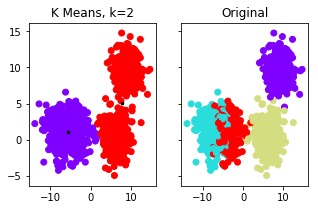

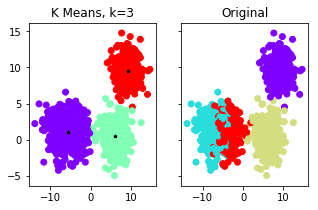

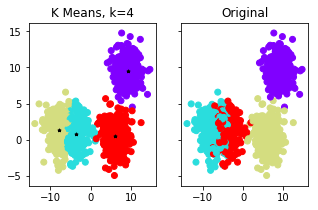

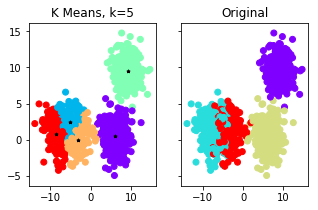

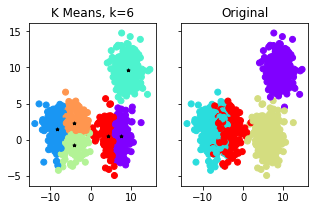

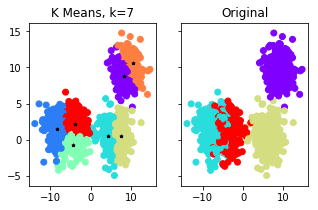

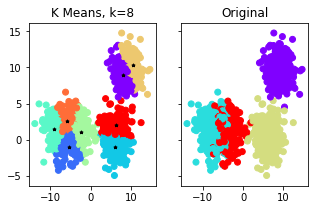

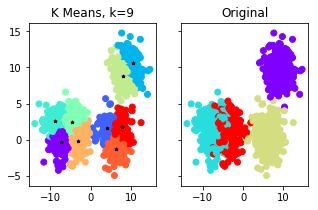

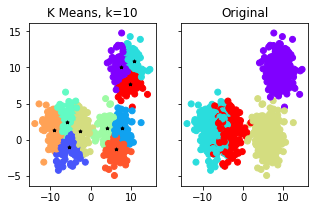

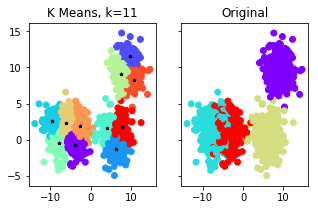

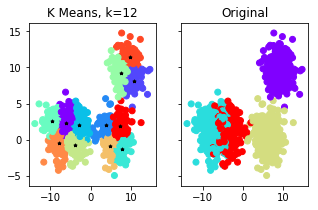

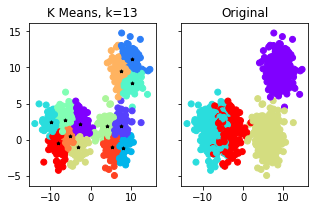

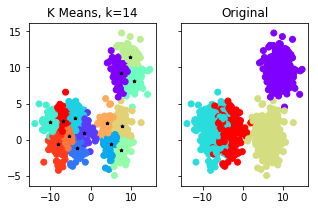

<Figure size 432x288 with 0 Axes>

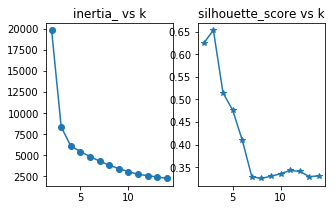

In [15]:
# error vs k
cluster = 4
data = make_blobs(n_samples=1000, n_features=2, 
                           centers=cluster, cluster_std=1.8)
sse=[]
sil_coeff=[]
for i in np.arange(2,15):
    #print(i)
    #kmeans.
    kmeans = KMeans(n_clusters=i,random_state=101)
    kmeans.fit(data[0])
    C = kmeans.cluster_centers_
    sse.append(kmeans.inertia_)
    label = kmeans.labels_
    sil_coeff.append(silhouette_score(data[0], label, metric='euclidean'))
    kmeans.inertia_
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(5,3))
    ax1.set_title('K Means, k=%i' %i)
    ax1.scatter(data[0][:,0],data[0][:,1],c=label,cmap='rainbow')
    ax1.scatter(C[:, 0], C[:, 1], marker='*', c='k', s=10)
    ax2.set_title("Original")
    ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

plt.figure()
f, (ax1, ax2) =  plt.subplots(1, 2, sharex=True,figsize=(5,3))
ax1.plot(np.arange(2,15),sse,'o-')
ax1.set_title('inertia_ vs k')
ax2.plot(np.arange(2,15),sil_coeff,'*-')
ax2.set_title('silhouette_score vs k')

#
# https://mubaris.com/posts/kmeans-clustering/
# https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
#
